In [159]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
import os
import io
import re
import unicodedata
from datetime import datetime
from itertools import groupby
from operator import itemgetter
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, make_scorer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from google.colab import files
uploaded = files.upload()

pivoted_df, Logistic Regression Model, baseline

In [5]:
pivoted_df = pd.read_csv(io.BytesIO(uploaded['pivoted_df.csv']), index_col=0)


In [6]:
pivoted_df.head()


,season,Age,Throws,Surgery,AB_release_speed_weighted_avg,CH_release_speed_weighted_avg,CS_release_speed_weighted_avg,CU_release_speed_weighted_avg,EP_release_speed_weighted_avg,FA_release_speed_weighted_avg,...,FS_vz0_weighted_avg,IN_vz0_weighted_avg,KC_vz0_weighted_avg,KN_vz0_weighted_avg,PO_vz0_weighted_avg,SC_vz0_weighted_avg,SI_vz0_weighted_avg,SL_vz0_weighted_avg,ST_vz0_weighted_avg,SV_vz0_weighted_avg
0,2008,37.0,1,0.0,0.0,82.641530,0.0,75.425843,0.0,0.0,...,0.0,7.335296,0.0,0.0,1.676319,0.0,-4.087597,-3.339929,0.0,0.0
1,2009,38.0,1,0.0,0.0,85.012195,0.0,78.181818,0.0,0.0,...,0.0,4.971030,0.0,0.0,0.000000,0.0,-3.124205,-2.492202,0.0,0.0
2,2010,39.0,1,0.0,0.0,84.150000,0.0,74.666667,0.0,0.0,...,0.0,5.705495,0.0,0.0,-0.118320,0.0,-3.576961,-3.186056,0.0,0.0
3,2011,40.0,1,0.0,0.0,83.093750,0.0,76.885714,0.0,0.0,...,0.0,7.108895,0.0,0.0,-0.907724,0.0,-3.631151,-2.303028,0.0,0.0
4,2012,41.0,1,0.0,0.0,83.001563,0.0,76.427273,0.0,0.0,...,0.0,7.101314,0.0,0.0,0.000000,0.0,-4.538380,-2.684632,0.0,0.0


In [4]:
pivoted_df['Surgery'].value_counts()

0.0    2772
1.0     916
Name: Surgery, dtype: int64

In [14]:
y = pivoted_df['Surgery']
X = pivoted_df.drop('Surgery', axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
logreg_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

# Define the parameter grid to search over
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__penalty': ['l1', 'l2']  # Norm used in the penalization
}

# Initialize GridSearchCV with the pipeline, parameter grid, and desired scoring metric
grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, scoring='accuracy')

# Assuming X_train and y_train are already defined
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters: ", grid_search.best_params_)

# Best cross-validation score
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Test set score using the best parameters
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters:  {'logreg__C': 10, 'logreg__penalty': 'l1'}
Best cross-validation score: 0.76
Test set score: 0.77


In [18]:
logreg_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l1', C=10.0, solver='liblinear'))
])

In [19]:
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=10.0, penalty='l1', solver='liblinear'))])

In [20]:
logreg_pipeline.score(X_test, y_test)

0.7687443541102078

In [21]:
y_pred = logreg_pipeline.predict(X_test)

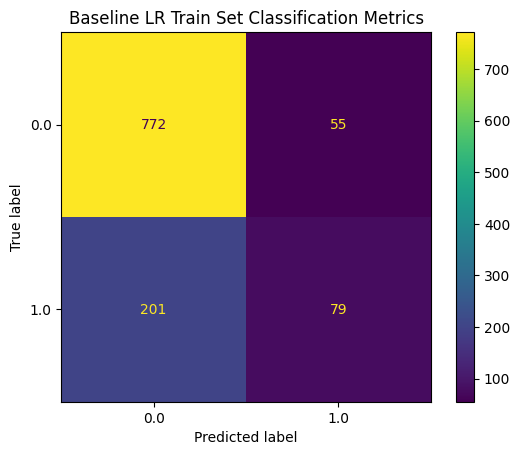

              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86       827
         1.0       0.59      0.28      0.38       280

    accuracy                           0.77      1107
   macro avg       0.69      0.61      0.62      1107
weighted avg       0.74      0.77      0.74      1107



In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Baseline LR Train Set Classification Metrics')
plt.show()
print(classification_report(y_test, y_pred))

pivoted_df, Logistic Regression Model, SMOTE

In [23]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(pd.Series(y_train_resampled).value_counts())

1.0    1945
0.0    1945
Name: Surgery, dtype: int64


In [24]:
logreg_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=10.0, penalty='l1', solver='liblinear'))])

In [25]:
y_pred_resampled = logreg_pipeline.predict(X_test)

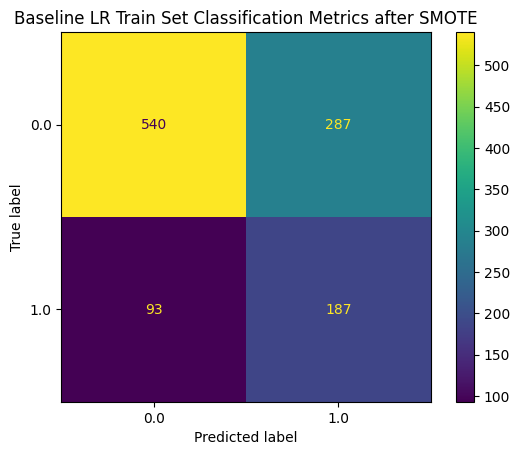

              precision    recall  f1-score   support

         0.0       0.85      0.65      0.74       827
         1.0       0.39      0.67      0.50       280

    accuracy                           0.66      1107
   macro avg       0.62      0.66      0.62      1107
weighted avg       0.74      0.66      0.68      1107



In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_resampled)
plt.title('Baseline LR Train Set Classification Metrics after SMOTE')
plt.show()
print(classification_report(y_test, y_pred_resampled))

Predicting 1.0 improved, however the rest of the model suffered.
Can try condensing the number of features and see how that plays out.

cond_pivoted_df, Logistic Regression, Baseline

In [23]:
cond_pivoted_df = pd.read_csv(io.BytesIO(uploaded['cond_pivoted_df.csv']), index_col=0)


In [84]:
cond_pivoted_df.head()

,season,Age,Throws,Surgery,BB_release_speed_weighted_avg,FB_release_speed_weighted_avg,OS_release_speed_weighted_avg,OT_release_speed_weighted_avg,SB_release_speed_weighted_avg,BB_release_pos_x_weighted_avg,...,BB_vy0_weighted_avg,FB_vy0_weighted_avg,OS_vy0_weighted_avg,OT_vy0_weighted_avg,SB_vy0_weighted_avg,BB_vz0_weighted_avg,FB_vz0_weighted_avg,OS_vz0_weighted_avg,OT_vz0_weighted_avg,SB_vz0_weighted_avg
0,2008,37.0,1,0.0,75.425843,91.689850,81.458265,50.600000,86.827813,-2.171910,...,-110.627789,-134.352990,-119.317618,-73.714833,-127.257269,-1.246458,-4.126779,-0.780223,7.335296,-3.339929
1,2009,38.0,1,0.0,78.181818,93.479869,85.012195,53.500000,87.919825,-2.452727,...,-114.570196,-136.926151,-124.551149,-78.119736,-128.804060,-0.254067,-3.423404,-1.272244,4.971030,-2.492202
2,2010,39.0,1,0.0,74.666667,93.001617,84.025000,58.238462,87.052860,-1.730000,...,-109.676484,-136.276075,-122.891563,-84.907173,-127.505575,1.382751,-3.954090,-1.065173,5.705495,-3.186056
3,2011,40.0,1,0.0,76.885714,91.678506,83.846875,52.594444,86.538075,-1.605714,...,-112.607261,-134.395791,-122.486963,-76.761205,-126.775541,-2.271918,-3.157704,-1.472148,7.108895,-2.303028
4,2012,41.0,1,0.0,76.427273,91.965592,83.001563,50.375000,85.657742,-1.366364,...,-112.083840,-134.748594,-121.548068,-73.528548,-125.463237,-0.468344,-4.148174,-3.095360,7.101314,-2.684632


In [86]:
cond_pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688 entries, 0 to 3687
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   season                         3688 non-null   int64  
 1   Age                            3688 non-null   float64
 2   Throws                         3688 non-null   int64  
 3   Surgery                        3688 non-null   float64
 4   BB_release_speed_weighted_avg  3688 non-null   float64
 5   FB_release_speed_weighted_avg  3688 non-null   float64
 6   OS_release_speed_weighted_avg  3688 non-null   float64
 7   OT_release_speed_weighted_avg  3688 non-null   float64
 8   SB_release_speed_weighted_avg  3688 non-null   float64
 9   BB_release_pos_x_weighted_avg  3688 non-null   float64
 10  FB_release_pos_x_weighted_avg  3688 non-null   float64
 11  OS_release_pos_x_weighted_avg  3688 non-null   float64
 12  OT_release_pos_x_weighted_avg  3688 non-null   f

In [31]:
cond_pivoted_df['Surgery'].value_counts()

0.0    2772
1.0     916
Name: Surgery, dtype: int64

In [83]:
cond_pivoted_df.drop(columns=['pitcher'], inplace=True)

In [18]:
y = cond_pivoted_df['Surgery']
X = cond_pivoted_df.drop('Surgery', axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
logreg_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

# Define the parameter grid to search over
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__penalty': ['l1', 'l2']  # Norm used in the penalization
}

# Initialize GridSearchCV with the pipeline, parameter grid, and desired scoring metric
grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, scoring='accuracy')

# Assuming X_train and y_train are already defined
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters found
print("Best parameters: ", grid_search.best_params_)

# Best cross-validation score
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Test set score using the best parameters
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters:  {'logreg__C': 10, 'logreg__penalty': 'l1'}
Best cross-validation score: 0.67
Test set score: 0.64


In [26]:
logreg_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l1', C=10.0, solver='liblinear'))
])

In [14]:
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('logreg',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

In [15]:
logreg_pipeline.score(X_test, y_test)

0.7497741644083108

In [16]:
y_pred = logreg_pipeline.predict(X_test)

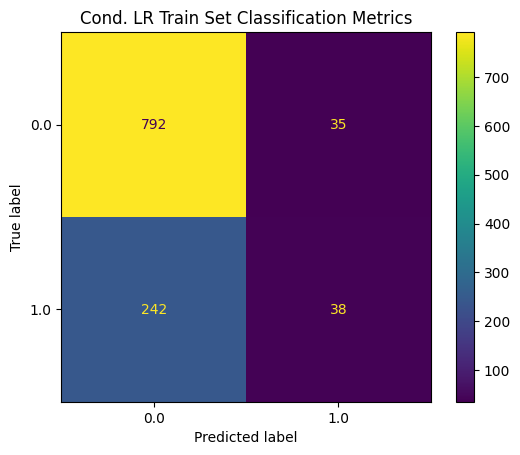

              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85       827
         1.0       0.52      0.14      0.22       280

    accuracy                           0.75      1107
   macro avg       0.64      0.55      0.53      1107
weighted avg       0.70      0.75      0.69      1107



In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Cond. LR Train Set Classification Metrics')
plt.show()
print(classification_report(y_test, y_pred))

Score for 1.0 predicting Surgery too low.
Now try with SMOTE.

cond_pivoted_df, Logistic Regression Model, SMOTE

In [25]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(pd.Series(y_train_resampled).value_counts())

1.0    1945
0.0    1945
Name: Surgery, dtype: int64


In [27]:
logreg_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=10.0, penalty='l1', solver='liblinear'))])

In [28]:
y_pred_resampled = logreg_pipeline.predict(X_test)

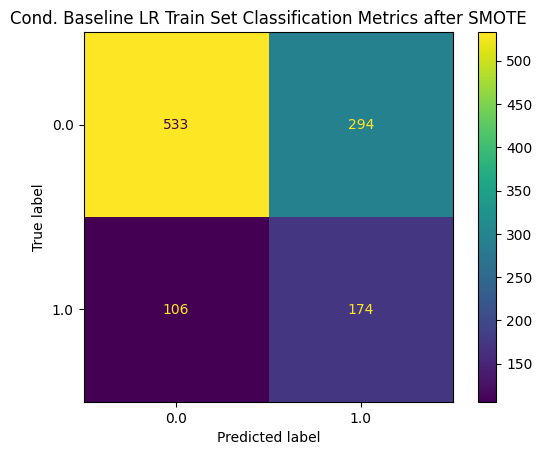

              precision    recall  f1-score   support

         0.0       0.83      0.64      0.73       827
         1.0       0.37      0.62      0.47       280

    accuracy                           0.64      1107
   macro avg       0.60      0.63      0.60      1107
weighted avg       0.72      0.64      0.66      1107



In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_resampled)
plt.title('Cond. Baseline LR Train Set Classification Metrics after SMOTE')
plt.show()
print(classification_report(y_test, y_pred_resampled))

pivot_df is better at predicting TP & TN. cond_pivot_df is better at FP & FN. Trade-off between two models is slim.
SMOTE helped, can I address class imbalance further, or will that lead to issues?
Still need to see improvement.
Need to try PCA, Random Forest, XG Boost

Try to see how GridSearch works when I add in class balance. Will try this out for both pivoted_df and cond_pivoted_df

pivoted_df, Logistic Regression Model, adjust class weights

In [14]:
y = pivoted_df['Surgery']
X = pivoted_df.drop('Surgery', axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Define the parameter grid to search over, including class weights
class_weights = [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__class_weight': class_weights,
    'logreg__max_iter': [5000],
    'logreg__tol': [0.01]
}

# Create a scoring function that focuses on recall for the positive class
recall_scorer = make_scorer(recall_score, pos_label=1)

# Initialize GridSearchCV with the pipeline, parameter grid, and recall as the scoring metric
grid_search = GridSearchCV(weight_logreg_pipeline, param_grid, cv=5, scoring=recall_scorer, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found and the best recall score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation recall score: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test set recall score: {:.2f}".format(recall_score(y_test, y_pred)))

Best parameters:  {'logreg__C': 0.01, 'logreg__class_weight': {0: 1, 1: 5}, 'logreg__max_iter': 5000, 'logreg__penalty': 'l1', 'logreg__tol': 0.01}
Best cross-validation recall score: 0.87
Test set recall score: 0.85


In [16]:
weight_logreg_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l1', C=0.01, class_weight={0:1, 1:5}, solver='liblinear'))
])

In [17]:
weight_logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.01, class_weight={0: 1, 1: 5},
                                    penalty='l1', solver='liblinear'))])

In [18]:
weight_logreg_pipeline.score(X_test, y_test)

0.5167118337850045

In [20]:
y_pred = weight_logreg_pipeline.predict(X_test)

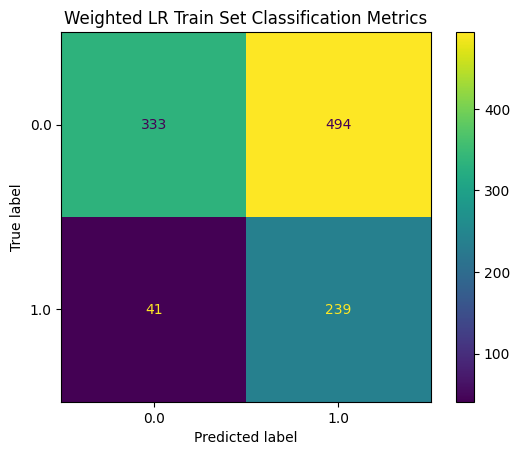

              precision    recall  f1-score   support

         0.0       0.89      0.40      0.55       827
         1.0       0.33      0.85      0.47       280

    accuracy                           0.52      1107
   macro avg       0.61      0.63      0.51      1107
weighted avg       0.75      0.52      0.53      1107



In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Weighted LR Train Set Classification Metrics')
plt.show()
print(classification_report(y_test, y_pred))

This looks better. The number of False negatives has decreased dramatically.
Would like to see further improvement to be more accurate all around.
Now to test cond_pivoted_df

cond_pivoted_df, Logistic Regression Model, adjust class weights.

In [41]:
y = cond_pivoted_df['Surgery']
X = cond_pivoted_df.drop('Surgery', axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Define the parameter grid to search over, including class weights
class_weights = [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}]
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__class_weight': class_weights,
    'logreg__max_iter': [5000],
    'logreg__tol': [0.01]
}

# Create a scoring function that focuses on recall for the positive class
recall_scorer = make_scorer(recall_score, pos_label=1)

# Initialize GridSearchCV with the pipeline, parameter grid, and recall as the scoring metric
grid_search = GridSearchCV(weight_logreg_pipeline, param_grid, cv=5, scoring=recall_scorer)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found and the best recall score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation recall score: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test set recall score: {:.2f}".format(recall_score(y_test, y_pred)))

Best parameters:  {'logreg__C': 0.01, 'logreg__class_weight': {0: 1, 1: 4}, 'logreg__max_iter': 5000, 'logreg__penalty': 'l1', 'logreg__tol': 0.01}
Best cross-validation recall score: 1.00
Test set recall score: 0.99


In [43]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(pd.Series(y_train_resampled).value_counts())

1.0    1945
0.0    1945
Name: Surgery, dtype: int64


In [44]:
weight_logreg_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l1', C=0.01, class_weight={0:1, 1:3}, solver='liblinear'))
])

In [45]:
weight_logreg_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.01, class_weight={0: 1, 1: 3},
                                    penalty='l1', solver='liblinear'))])

In [46]:
y_pred_resampled = weight_logreg_pipeline.predict(X_test)

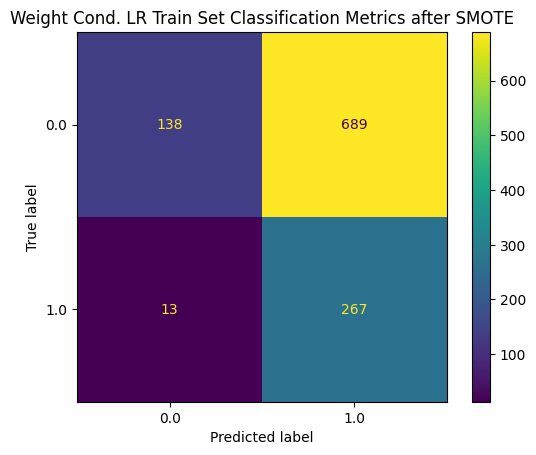

              precision    recall  f1-score   support

         0.0       0.91      0.17      0.28       827
         1.0       0.28      0.95      0.43       280

    accuracy                           0.37      1107
   macro avg       0.60      0.56      0.36      1107
weighted avg       0.75      0.37      0.32      1107



In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_resampled)
plt.title('Weight Cond. LR Train Set Classification Metrics after SMOTE')
plt.show()
print(classification_report(y_test, y_pred_resampled))

Can revisit the Logistic Regression model later. Time to try Random Forest, XG Boost, maybe CatBoost (not sure if it applies..)

pivoted_df, Decision Tree (Baseline Model)

In [50]:
y = pivoted_df['Surgery']
X = pivoted_df.drop('Surgery', axis=1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [53]:
tree_clf.feature_importances_

array([0.19477055, 0.15049678, 0.        , 0.        , 0.        ,
       0.01033349, 0.03611204, 0.        , 0.        , 0.        ,
       0.04363543, 0.09102768, 0.01991462, 0.03879671, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02612076, 0.        , 0.01246673,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02465828, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02142519, 0.        , 0.        , 0.        , 0.06182032,
       0.        , 0.04426144, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

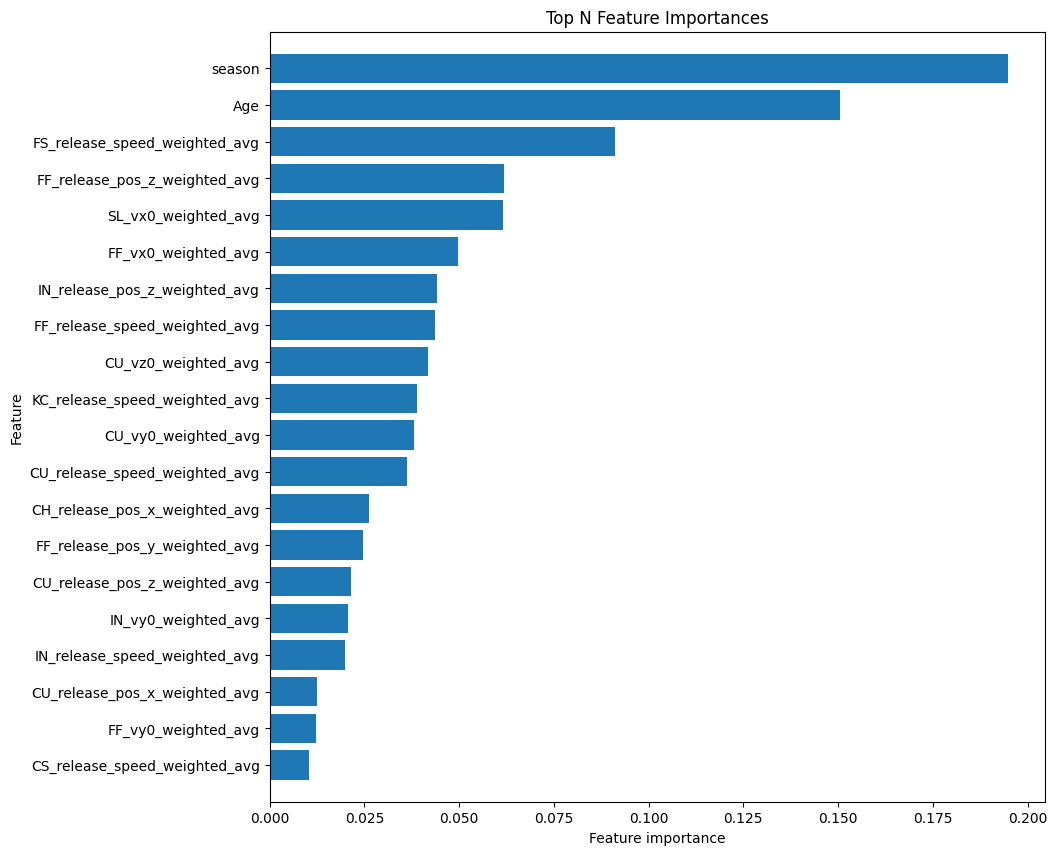

In [57]:
def plot_feature_importances(model, n_top_features=20):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-n_top_features:]
    plt.figure(figsize=(10,10))
    plt.title('Top N Feature Importances')
    plt.barh(range(n_top_features), importances[indices], align='center')
    plt.yticks(range(n_top_features), [X_train.columns[i] for i in indices])
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_top_features)

plot_feature_importances(tree_clf, n_top_features=20)
plt.show()

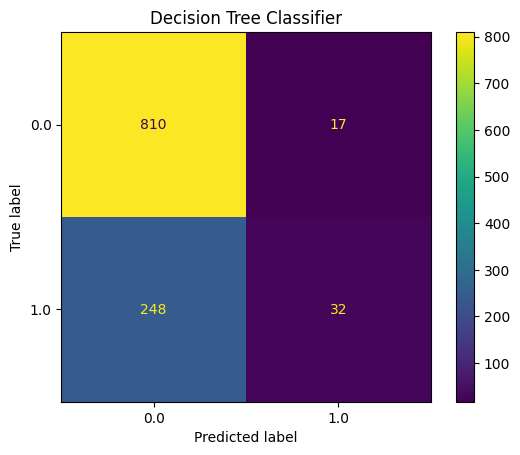

              precision    recall  f1-score   support

         0.0       0.77      0.98      0.86       827
         1.0       0.65      0.11      0.19       280

    accuracy                           0.76      1107
   macro avg       0.71      0.55      0.53      1107
weighted avg       0.74      0.76      0.69      1107



In [59]:
pred = tree_clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title('pivoted_df Decision Tree Classifier')
plt.show()
print(classification_report(y_test, pred))

In [66]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}]
}

tree_clf = DecisionTreeClassifier()
scorer = make_scorer(recall_score)
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))


Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 0.6540600393700788
Test set accuracy: 0.5817524841915086


In [61]:
y = pivoted_df['Surgery']
X = pivoted_df.drop('Surgery', axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1, min_samples_split=10)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

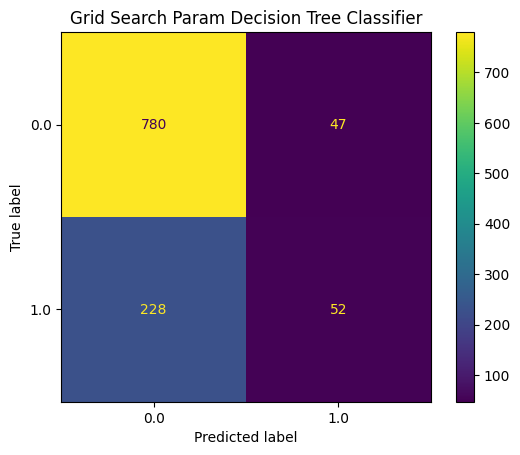

              precision    recall  f1-score   support

         0.0       0.77      0.94      0.85       827
         1.0       0.53      0.19      0.27       280

    accuracy                           0.75      1107
   macro avg       0.65      0.56      0.56      1107
weighted avg       0.71      0.75      0.70      1107



In [64]:
pred = tree_clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title('Grid Search Param Decision Tree Classifier')
plt.show()
print(classification_report(y_test, pred))

Grid Search improved on TN & FN but worse on TP & TN. Would rather improve on TN than FN. Can try rerunning.

In [67]:
y = pivoted_df['Surgery']
X = pivoted_df.drop('Surgery', axis=1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
tree_clf = DecisionTreeClassifier(criterion='gini', class_weight='balanced', max_depth=5, min_samples_leaf=4, min_samples_split=10)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=4,
                       min_samples_split=10)

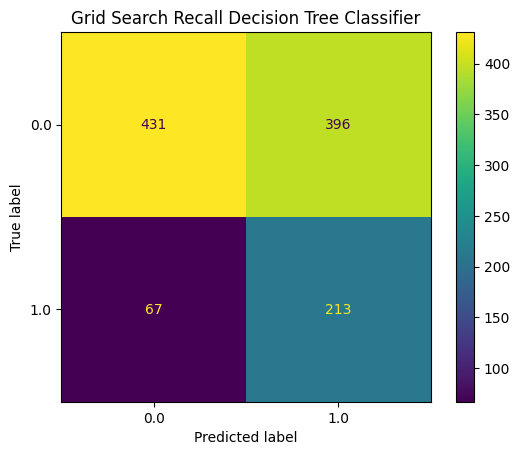

              precision    recall  f1-score   support

         0.0       0.87      0.52      0.65       827
         1.0       0.35      0.76      0.48       280

    accuracy                           0.58      1107
   macro avg       0.61      0.64      0.56      1107
weighted avg       0.74      0.58      0.61      1107



In [71]:
pred = tree_clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title('Grid Search Recall Decision Tree Classifier')
plt.show()
print(classification_report(y_test, pred))

cond_pivoted_df, Decision Tree Classifier

In [89]:
cond_pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688 entries, 0 to 3687
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   season                         3688 non-null   int64  
 1   Age                            3688 non-null   float64
 2   Throws                         3688 non-null   int64  
 3   Surgery                        3688 non-null   float64
 4   BB_release_speed_weighted_avg  3688 non-null   float64
 5   FB_release_speed_weighted_avg  3688 non-null   float64
 6   OS_release_speed_weighted_avg  3688 non-null   float64
 7   OT_release_speed_weighted_avg  3688 non-null   float64
 8   SB_release_speed_weighted_avg  3688 non-null   float64
 9   BB_release_pos_x_weighted_avg  3688 non-null   float64
 10  FB_release_pos_x_weighted_avg  3688 non-null   float64
 11  OS_release_pos_x_weighted_avg  3688 non-null   float64
 12  OT_release_pos_x_weighted_avg  3688 non-null   f

In [95]:
y = cond_pivoted_df['Surgery']
X = cond_pivoted_df.drop('Surgery', axis=1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

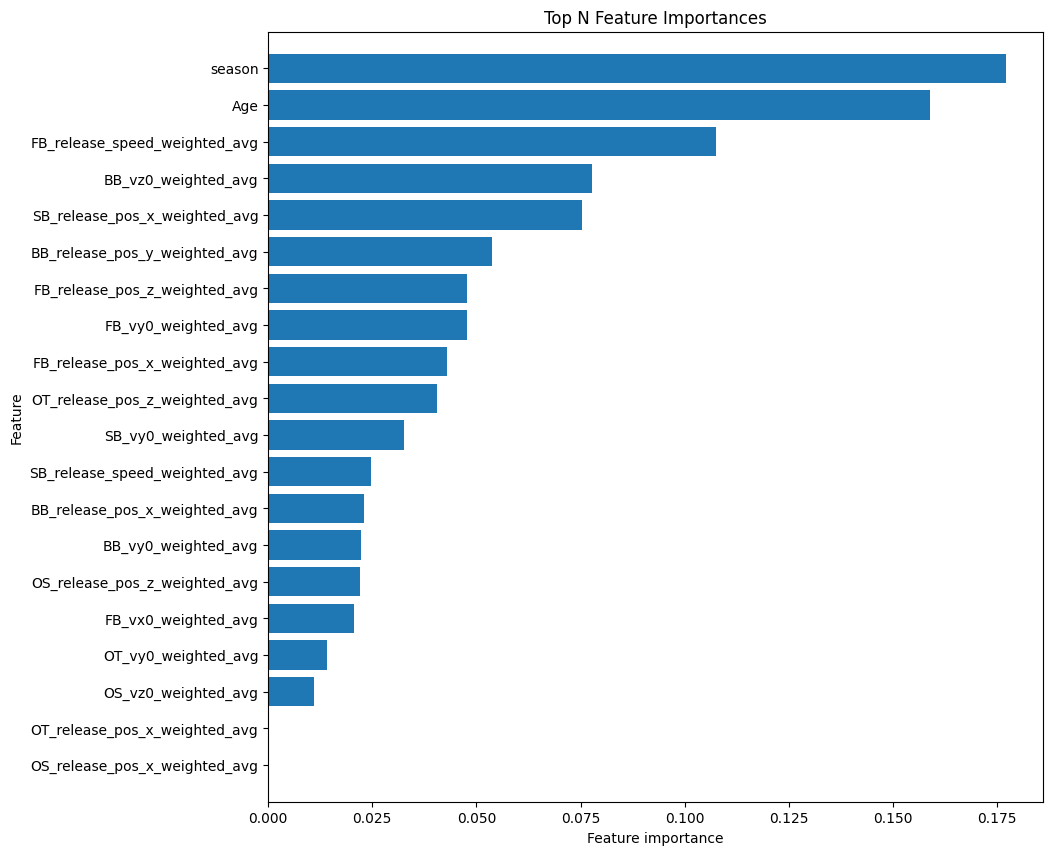

In [93]:
plot_feature_importances(tree_clf, n_top_features=20)
plt.show()

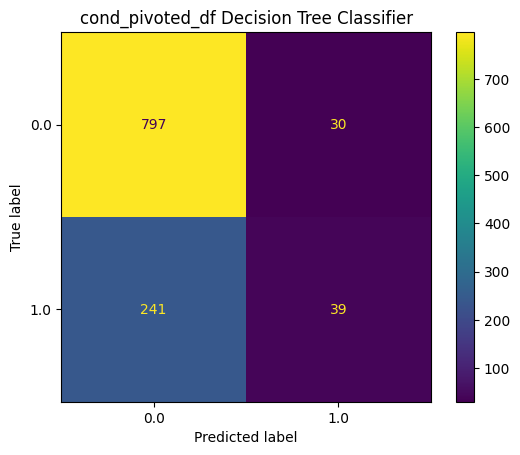

              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85       827
         1.0       0.57      0.14      0.22       280

    accuracy                           0.76      1107
   macro avg       0.67      0.55      0.54      1107
weighted avg       0.72      0.76      0.70      1107



In [94]:
pred = tree_clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title('cond_pivoted_df Decision Tree Classifier')
plt.show()
print(classification_report(y_test, pred))

cond_pivoted_df not predicting TP & FP well.

In [97]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}]
}

tree_clf = DecisionTreeClassifier()
scorer = make_scorer(recall_score)
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))


Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 0.7031373031496063
Test set accuracy: 0.6621499548328816


In [98]:
y = cond_pivoted_df['Surgery']
X = cond_pivoted_df.drop('Surgery', axis=1)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [100]:
tree_clf = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=5, min_samples_leaf=4, min_samples_split=10)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_leaf=4, min_samples_split=10)

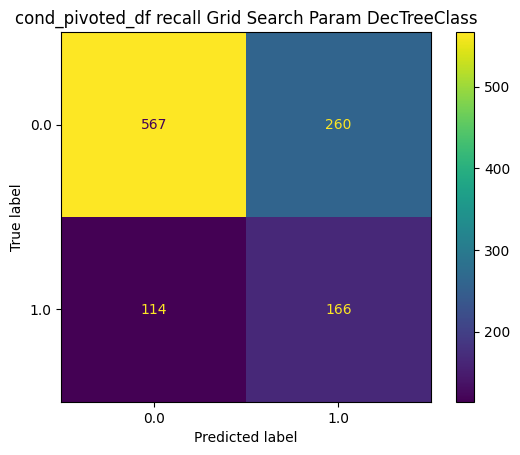

              precision    recall  f1-score   support

         0.0       0.83      0.69      0.75       827
         1.0       0.39      0.59      0.47       280

    accuracy                           0.66      1107
   macro avg       0.61      0.64      0.61      1107
weighted avg       0.72      0.66      0.68      1107



In [101]:
pred = tree_clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title('cond_pivoted_df recall Grid Search Param DecTreeClass')
plt.show()
print(classification_report(y_test, pred))

Better, but FN is high compared to other models.

pivoted_df, Random Forest

In [102]:
y = pivoted_df['Surgery']
X = pivoted_df.drop('Surgery', axis=1)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
forest_clf = RandomForestClassifier(n_estimators=100, max_depth=5)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [105]:
forest_clf.score(X_train, y_train)

0.7667570709027509

In [106]:
forest_clf.score(X_test, y_test)

0.7515808491418248

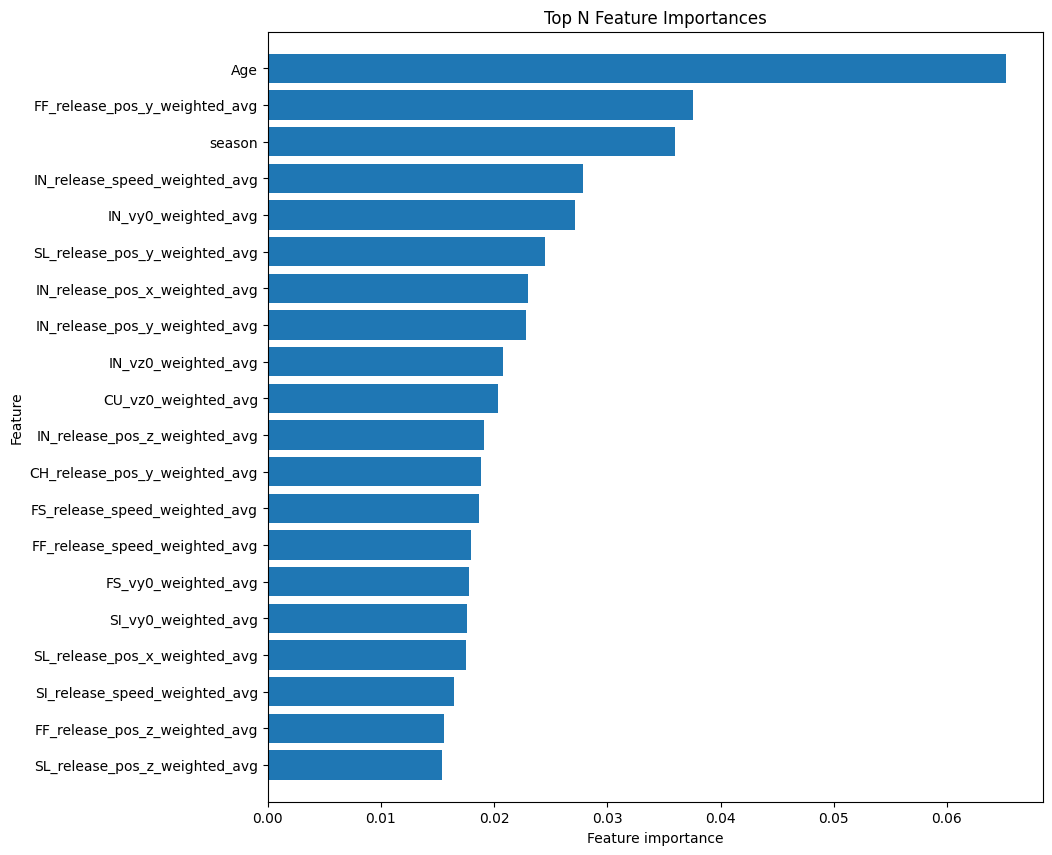

In [107]:
plot_feature_importances(forest_clf, n_top_features=20)
plt.show()

In [108]:
forest2_clf = RandomForestClassifier(n_estimators=5, max_features=10, max_depth=2)
forest2_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5)

In [109]:
rf_tree_1 = forest2_clf.estimators_[0]

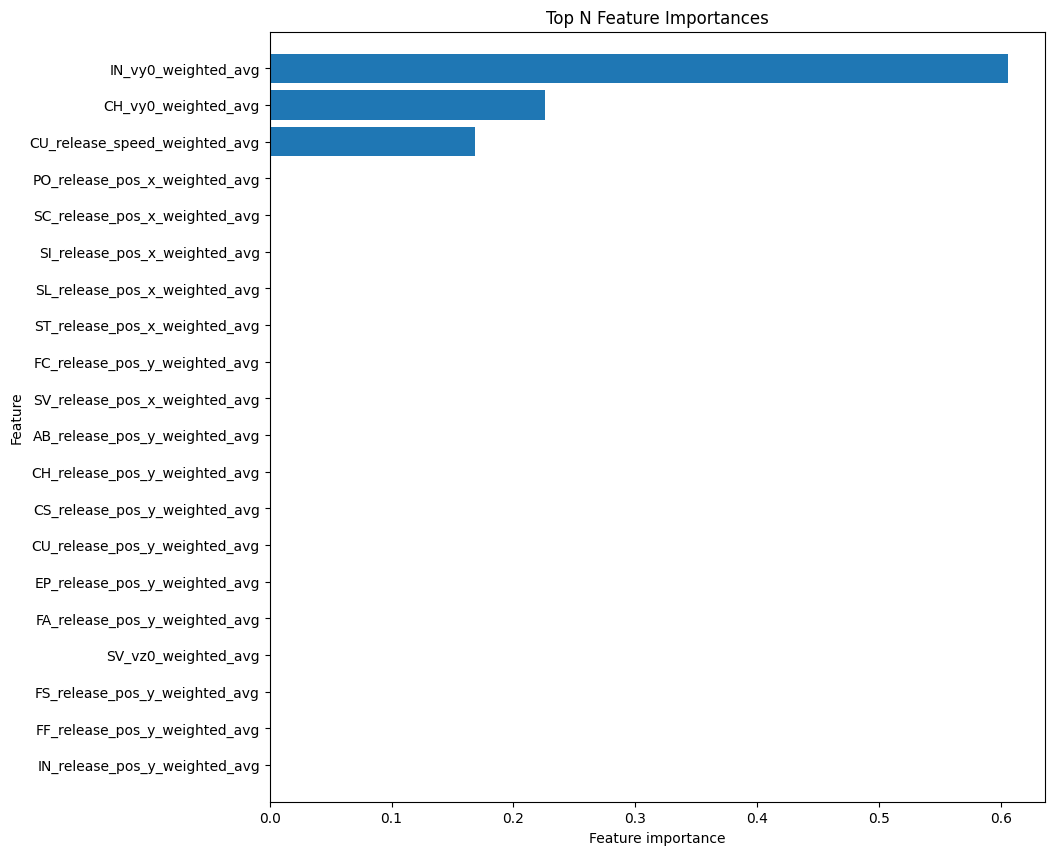

In [110]:
plot_feature_importances(rf_tree_1, n_top_features=20)
plt.show()

In [111]:
rf_tree_2 = forest2_clf.estimators_[1]

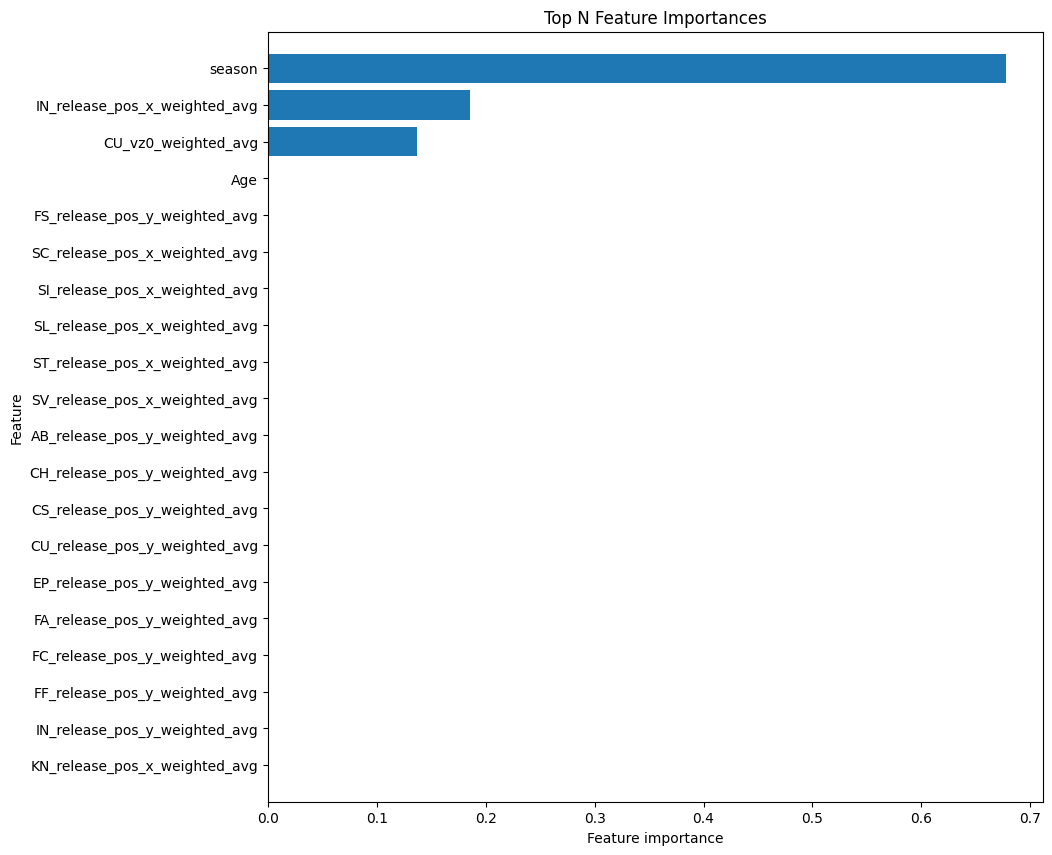

In [112]:
plot_feature_importances(rf_tree_2, n_top_features=20)
plt.show()

In [118]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}]
}

forest_clf = RandomForestClassifier()
accuracy_scorer = make_scorer(accuracy_score)
grid_search_rf = GridSearchCV(estimator=forest_clf, param_grid=param_grid_rf, scoring=accuracy_scorer, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters:", grid_search_rf.best_params_)
print("Best accuracy score:", grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Test set accuracy score:", accuracy_score(y_test, y_pred_rf))

Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy score: 0.8109314320843268
Test set accuracy score: 0.8175248419150858


In [123]:
y = pivoted_df['Surgery']
X = pivoted_df.drop('Surgery', axis=1)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
forest_clf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=4, n_estimators=300)

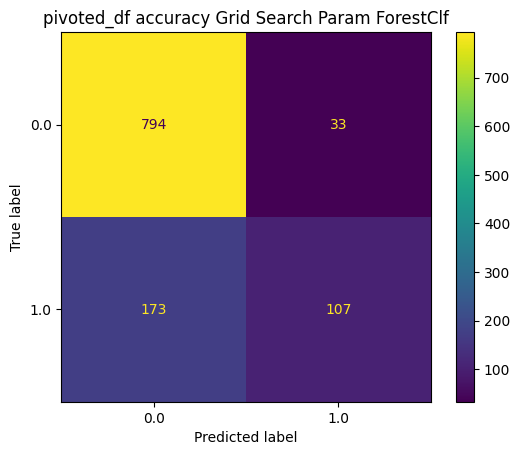

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89       827
         1.0       0.76      0.38      0.51       280

    accuracy                           0.81      1107
   macro avg       0.79      0.67      0.70      1107
weighted avg       0.81      0.81      0.79      1107



In [122]:
pred = forest_clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title('pivoted_df accuracy Grid Search Param ForestClf')
plt.show()
print(classification_report(y_test, pred))

Again, TN & TP are good, but FP is too small compared to FN.
Will try this with recall score.

In [132]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}]
}

forest_clf = RandomForestClassifier()
recall_scorer = make_scorer(recall_score)
grid_search_rf = GridSearchCV(estimator=forest_clf, param_grid=param_grid_rf, scoring=accuracy_scorer, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters:", grid_search_rf.best_params_)
print("Best accuracy score:", grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Test set accuracy score:", recall_score(y_test, y_pred_rf))

Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy score: 0.810923935045657
Test set accuracy score: 0.34285714285714286


In [133]:
y = pivoted_df['Surgery']
X = pivoted_df.drop('Surgery', axis=1)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [136]:
forest_clf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=2, min_samples_split=10)

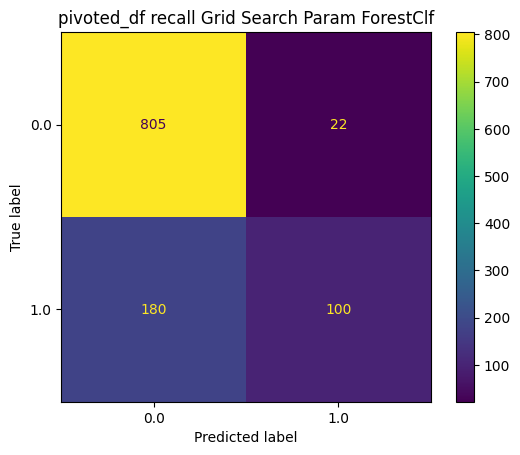

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89       827
         1.0       0.82      0.36      0.50       280

    accuracy                           0.82      1107
   macro avg       0.82      0.67      0.69      1107
weighted avg       0.82      0.82      0.79      1107



In [137]:
pred = forest_clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title('pivoted_df recall Grid Search Param ForestClf')
plt.show()
print(classification_report(y_test, pred))

Not great. Would like to see lower FN and higher TP & FP.

cond_pivoted_df, Random Forest

In [138]:
y = cond_pivoted_df['Surgery']
X = cond_pivoted_df.drop('Surgery', axis=1)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
forest_clf = RandomForestClassifier(n_estimators=100, max_depth=5)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [141]:
forest_clf.score(X_train, y_train)

0.7729562185199536

In [142]:
forest_clf.score(X_test, y_test)

0.7497741644083108

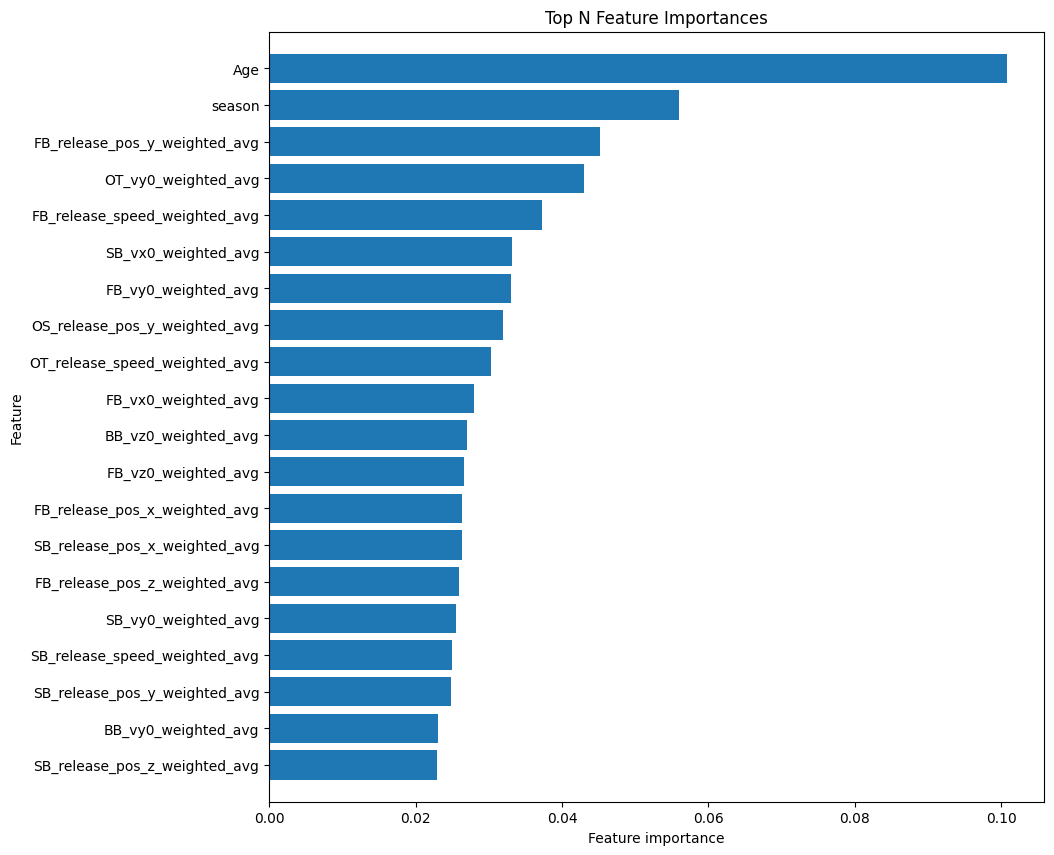

In [143]:
plot_feature_importances(forest_clf, n_top_features=20)
plt.show()

In [146]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}]
}

forest_clf = RandomForestClassifier()
accuracy_scorer = make_scorer(accuracy_score)
grid_search_rf = GridSearchCV(estimator=forest_clf, param_grid=param_grid_rf, scoring=accuracy_scorer, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters:", grid_search_rf.best_params_)
print("Best accuracy score:", grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Test set accuracy score:", accuracy_score(y_test, y_pred_rf))

Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best accuracy score: 0.8085953548348404
Test set accuracy score: 0.8121047877145439


In [147]:
y = cond_pivoted_df['Surgery']
X = cond_pivoted_df.drop('Surgery', axis=1)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [149]:
forest_clf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

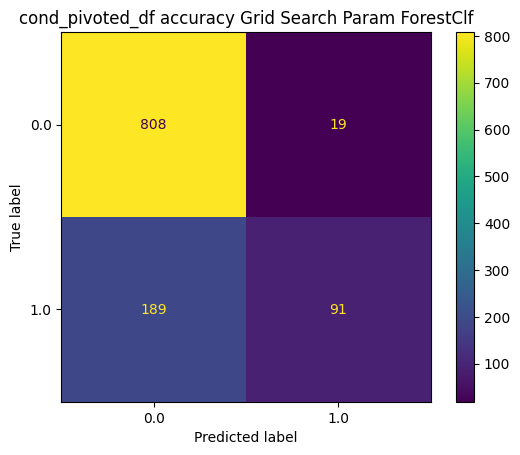

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89       827
         1.0       0.83      0.33      0.47       280

    accuracy                           0.81      1107
   macro avg       0.82      0.65      0.68      1107
weighted avg       0.81      0.81      0.78      1107



In [151]:
pred = forest_clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title('cond_pivoted_df accuracy Grid Search Param ForestClf')
plt.show()
print(classification_report(y_test, pred))

Try recall score.

In [154]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}]
}

forest_clf = RandomForestClassifier()
recall_scorer = make_scorer(recall_score)
grid_search_rf = GridSearchCV(estimator=forest_clf, param_grid=param_grid_rf, scoring=accuracy_scorer, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters:", grid_search_rf.best_params_)
print("Best accuracy score:", grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Test set accuracy score:", recall_score(y_test, y_pred_rf))

Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best accuracy score: 0.8074348132487668
Test set accuracy score: 0.33214285714285713


In [155]:
y = cond_pivoted_df['Surgery']
X = cond_pivoted_df.drop('Surgery', axis=1)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [157]:
forest_clf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, min_samples_leaf=2, min_samples_split=5)

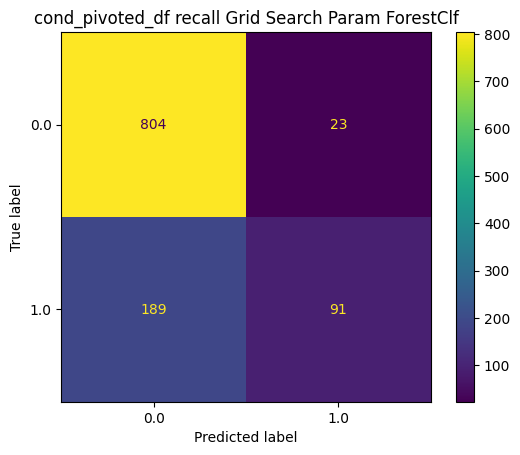

              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88       827
         1.0       0.80      0.33      0.46       280

    accuracy                           0.81      1107
   macro avg       0.80      0.65      0.67      1107
weighted avg       0.81      0.81      0.78      1107



In [158]:
pred = forest_clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title('cond_pivoted_df recall Grid Search Param ForestClf')
plt.show()
print(classification_report(y_test, pred))

Odd. Scores are very similar.
Is there a way to better these scores?
May just have to move onto another model. XG Boost?

pivoted_df XG Boost

In [171]:
y = pivoted_df['Surgery']
X = pivoted_df.drop('Surgery', axis=1)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [167]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [168]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [169]:
y_pred = xgb_clf.predict(X_test)

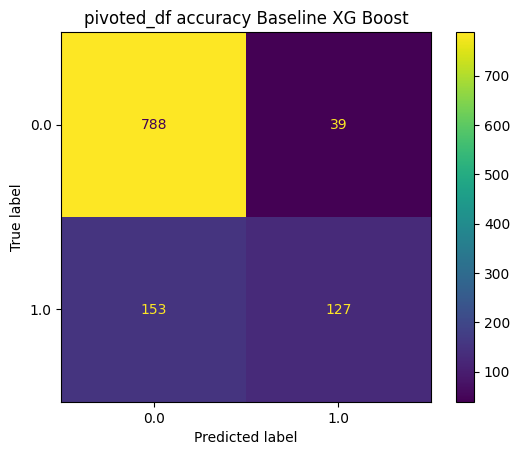

              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88       827
         1.0       0.80      0.33      0.46       280

    accuracy                           0.81      1107
   macro avg       0.80      0.65      0.67      1107
weighted avg       0.81      0.81      0.78      1107



In [170]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('pivoted_df accuracy Baseline XG Boost')
plt.show()
print(classification_report(y_test, pred))

Pretty good. Would like to see lower FN and higher scores for everything else.
Will try GridSearch.

In [183]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_clf = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, scoring='recall', cv=5, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print("Best parameters:", grid_search_xgb.best_params_)
print("Best recall score:", grid_search_xgb.best_score_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
print("Test set recall score:", recall_score(y_test, y_pred_best_xgb))
print(classification_report(y_test, y_pred_best_xgb))

Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best recall score: 0.4323941929133858
Test set recall score: 0.45357142857142857
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89       827
         1.0       0.79      0.45      0.58       280

    accuracy                           0.83      1107
   macro avg       0.81      0.71      0.74      1107
weighted avg       0.83      0.83      0.81      1107



In [184]:
y = pivoted_df['Surgery']
X = pivoted_df.drop('Surgery', axis=1)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [186]:
xgb_clf = XGBClassifier(colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8, use_label_encoder=False, eval_metric='logloss')

In [187]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [188]:
y_pred = xgb_clf.predict(X_test)

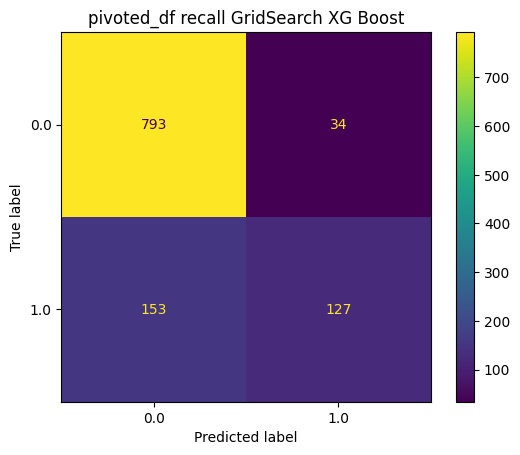

              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88       827
         1.0       0.80      0.33      0.46       280

    accuracy                           0.81      1107
   macro avg       0.80      0.65      0.67      1107
weighted avg       0.81      0.81      0.78      1107



In [190]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('pivoted_df recall GridSearch XG Boost')
plt.show()
print(classification_report(y_test, pred))

Essentially the same score as the previous model.
Will try with cond_pivoted_df now.

cond_pivoted_df, XG Boost

In [191]:
y = cond_pivoted_df['Surgery']
X = cond_pivoted_df.drop('Surgery', axis=1)

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [193]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [194]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [195]:
y_pred = xgb_clf.predict(X_test)

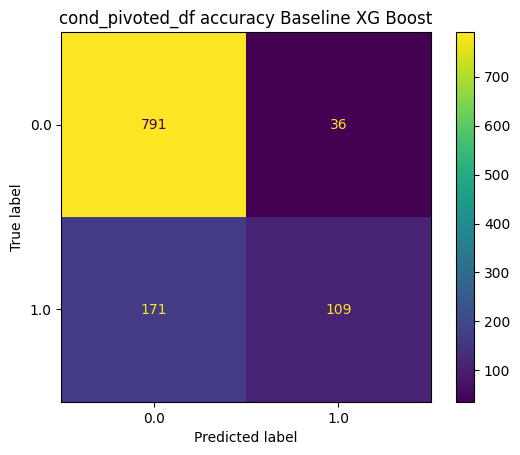

              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88       827
         1.0       0.80      0.33      0.46       280

    accuracy                           0.81      1107
   macro avg       0.80      0.65      0.67      1107
weighted avg       0.81      0.81      0.78      1107



In [196]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('cond_pivoted_df accuracy Baseline XG Boost')
plt.show()
print(classification_report(y_test, pred))

In [202]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

cond_xgb_clf = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

grid_search_xgb = GridSearchCV(estimator=cond_xgb_clf, param_grid=param_grid_xgb, scoring='recall', cv=5, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print("Best parameters:", grid_search_xgb.best_params_)
print("Best recall score:", grid_search_xgb.best_score_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
print("Test set recall score:", recall_score(y_test, y_pred_best_xgb))
print(classification_report(y_test, y_pred_best_xgb))

Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best recall score: 0.4323941929133858
Test set recall score: 0.45357142857142857
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89       827
         1.0       0.79      0.45      0.58       280

    accuracy                           0.83      1107
   macro avg       0.81      0.71      0.74      1107
weighted avg       0.83      0.83      0.81      1107



In [203]:
y = pivoted_df['Surgery']
X = pivoted_df.drop('Surgery', axis=1)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [205]:
cond_xgb_clf = XGBClassifier(colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8, use_label_encoder=False, eval_metric='logloss')

In [206]:
cond_xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [207]:
y_pred = cond_xgb_clf.predict(X_test)

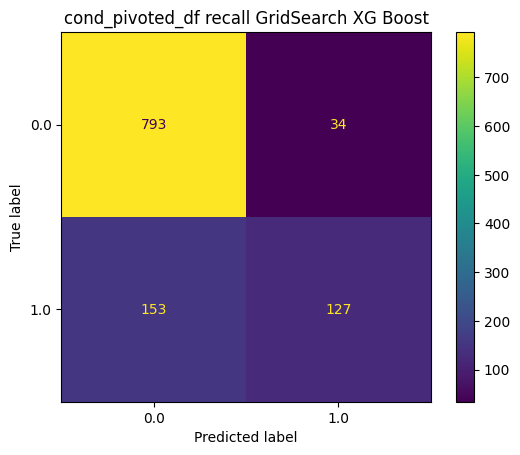

              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88       827
         1.0       0.80      0.33      0.46       280

    accuracy                           0.81      1107
   macro avg       0.80      0.65      0.67      1107
weighted avg       0.81      0.81      0.78      1107



In [208]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('cond_pivoted_df recall GridSearch XG Boost')
plt.show()
print(classification_report(y_test, pred))

A little bit better. Will have to look into how to better tune all the various models parameters tomorrow.